In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [35]:
file1 = "/content/shakespeare.txt"
shakesdata = open(file1, "r")

In [36]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

In [37]:
sw = stopwords.words('english')
plt.style.use('ggplot')

In [38]:
#remove new lines
shakesdata = [line.rstrip('\n') for line in shakesdata]

In [39]:
# make all characters lower
shakesdata = [line.lower() for line in shakesdata]

In [40]:
shakesdata = [line.translate(str.maketrans('','',string.punctuation)) for line in shakesdata]

In [41]:
# tokenize
shakesdata = [word_tokenize(line) for line in shakesdata]

In [42]:
def remove_stopwords(lines, sw):
  '''
  The purpose of this function is to remove stopwords from a given array of lines
  
  params:
    lines (Array / List) : The list of lines you want to remove the stopwords from sw (Set) : The set of stopwords you want to remove

  example:
    lines = remove_stopwords(lines = lines, sw = sw)
  '''

  res = []
  for line in lines:
    original = line
    line = [w for w in line if w not in sw]
    if len(line) < 1:
      line = original
    res.append(line)
  return res

In [43]:
filtered_lines = remove_stopwords(shakesdata, sw)

In [47]:
w = w2v(
    filtered_lines,
    min_count=3,
    sg = 1,
    window=7
)

print(w.wv.most_similar('bad'))

emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)

print(emb_df.shape)
emb_df



[('time', 0.9966842532157898), ('1', 0.9966453313827515), ('0', 0.9965566992759705), ('us', 0.9962326288223267), ('feel', 0.9961256384849548), ('ever', 0.996030867099762), ('really', 0.9957625269889832), ('still', 0.995755672454834), ('like', 0.995688259601593), ('best', 0.9956592917442322)]
(481, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.003147,0.138408,-0.010447,0.016130,0.104968,-0.283539,0.102490,0.363400,-0.183211,-0.074052,...,0.301865,0.114729,-0.157439,0.076053,0.292147,0.088780,0.001825,-0.100085,0.019558,-0.114911
0,-0.004203,0.176429,-0.013562,0.013958,0.151040,-0.350136,0.120460,0.445357,-0.223722,-0.094272,...,0.374825,0.141043,-0.197202,0.085593,0.346731,0.105502,0.019092,-0.118461,0.013305,-0.147263
food,0.003075,0.107973,-0.018744,0.003163,0.094994,-0.202396,0.069653,0.271625,-0.142913,-0.047899,...,0.224473,0.092466,-0.113647,0.053424,0.222396,0.068840,0.014308,-0.070579,0.023326,-0.099796
place,-0.005788,0.116591,-0.011393,0.003083,0.094431,-0.218616,0.077434,0.280952,-0.132517,-0.062304,...,0.225392,0.087604,-0.125476,0.055837,0.228592,0.064868,0.014784,-0.079429,0.011598,-0.100300
good,-0.004398,0.092960,-0.017255,0.002712,0.080383,-0.179433,0.065462,0.238360,-0.123106,-0.040054,...,0.205015,0.070910,-0.102973,0.046652,0.190816,0.047113,0.012820,-0.056901,0.013861,-0.077937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
different,-0.000047,0.037745,0.001495,-0.004694,0.031047,-0.050359,0.015118,0.073875,-0.040052,-0.024758,...,0.066518,0.028557,-0.040642,0.016584,0.051716,0.015895,-0.004522,-0.026085,0.008091,-0.020023
stale,-0.002813,0.016705,-0.003062,0.005534,0.018741,-0.049264,0.015741,0.059826,-0.035150,-0.008645,...,0.037540,0.025899,-0.015294,0.000981,0.046183,0.008174,0.004979,-0.003373,-0.005512,-0.018623
watched,0.004423,0.035932,-0.001345,-0.006474,0.033214,-0.075493,0.032148,0.086190,-0.039928,-0.017851,...,0.082836,0.032454,-0.038975,0.010405,0.082007,0.021195,-0.002510,-0.025221,0.003498,-0.034152
ate,0.009965,0.031409,-0.007300,-0.008274,0.031955,-0.076088,0.025904,0.099770,-0.053154,-0.028326,...,0.079711,0.028011,-0.047569,0.015627,0.068784,0.025216,0.012502,-0.025138,-0.003568,-0.035521


[]

<Figure size 640x480 with 0 Axes>

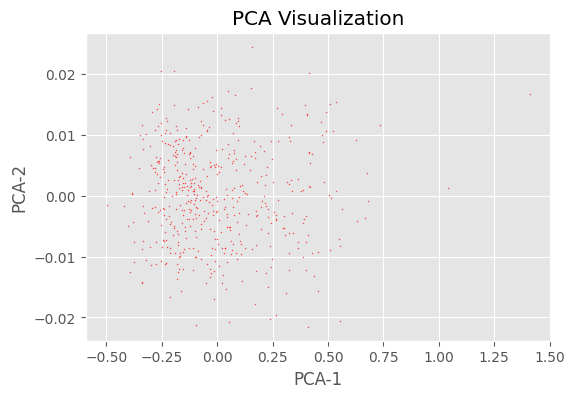

In [48]:
pca = PCA(n_components=2, random_state=7)
pca_md1 = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_md1,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'red',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()